In [6]:
# Dependencies
import requests
import json
import csv
import numpy as np
import pandas
import matplotlib.pyplot as plt
import scipy.stats as st
from citipy import citipy

api_key = '4b9ae179b18c6c494e342b8d5938274b' # Put into config -- TO BE DONE
base_url = 'https://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

In [7]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Empty lists
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['vanimo', 'busselton', 'anadyr', 'hermanus', 'hithadhoo', 'albany', 'lebu', 'kiruna', 'kindu', 'belushya guba', 'banda aceh', 'thompson', 'gold coast', 'rikitea', 'victoria', 'provideniya', 'taolanaro', 'dzhusaly', 'ushuaia', 'tasiilaq', 'bluff', 'srednekolymsk', 'kaitangata', 'ano mera', 'longyearbyen', 'mangrol', 'salalah', 'lesnoy', 'port alfred', 'malwan', 'tessalit', 'clyde river', 'severo-kurilsk', 'comodoro rivadavia', 'barentsburg', 'hofn', 'kapaa', 'bowen', 'sorland', 'nalut', 'mys shmidta', 'vaitupu', 'porrentruy', 'kodiak', 'cape town', 'jamestown', 'arraial do cabo', 'fort nelson', 'mataura', 'hobart', 'mount isa', 'new norfolk', 'magan', 'fairbanks', 'kualakapuas', 'butaritari', 'waipawa', 'vestmanna', 'jamsa', 'umzimvubu', 'hilo', 'kavaratti', 'komsomolskiy', 'port hedland', 'masallatah', 'vila velha', 'lom sak', 'xichang', 'saskylakh', 'takoradi', 'castro', 'geraldton']


In [29]:
# Function to return weather based on city parameter
def getWeather(cities):
    return requests.get(base_url + city + '&appid=' + api_key + '&units=' + units).json()

In [10]:
# Initializing prompt
print('Beginning Data Retrieval')
print('-----------------------------')

# Print log of all API calls and their results
city_names = []
country = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed  = []
latitude = []
longitude = []
x = 0

for city in cities:
    try:
        city_names.append(getWeather(city)['name'])
        country.append(getWeather(city)['sys']['country'])
        max_temperature.append(getWeather(city)['main']['temp_max'])
        humidity.append(getWeather(city)['main']['humidity'])
        cloudiness.append(getWeather(city)['clouds']['all'])
        wind_speed.append(getWeather(city)['wind']['speed'])
        latitude.append(getWeather(city)['coord']['lat'])
        longitude.append(getWeather(city)['coord']['lon'])
        print('Processing record', x, '|', getWeather(city)['name']) #CORRECT COUNTER +1 -- IF TIME ALLOWS
        x += 1
    except KeyError:
        print('City not found. Skipping...')

# Termination prompt        
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing record 0 | Vanimo
Processing record 1 | Busselton
Processing record 2 | Anadyr
Processing record 3 | Hermanus
Processing record 4 | Hithadhoo
Processing record 5 | Albany
Processing record 6 | Lebu
Processing record 7 | Kiruna
Processing record 8 | Kindu
City not found. Skipping...
Processing record 9 | Banda Aceh
Processing record 10 | Thompson
Processing record 11 | Gold Coast
Processing record 12 | Rikitea
Processing record 13 | Hong Kong
Processing record 14 | Provideniya
City not found. Skipping...
City not found. Skipping...
Processing record 15 | Ushuaia
Processing record 16 | Tasiilaq
Processing record 17 | Bluff
Processing record 18 | Srednekolymsk
Processing record 19 | Kaitangata
Processing record 20 | Ano Mera
Processing record 21 | Longyearbyen
Processing record 22 | Māngrol
Processing record 23 | Salalah
Processing record 24 | Lesnoy
Processing record 25 | Port Alfred
City not found. Skipping...
Processing 

In [12]:
# Combine lists via zip
weather_data = zip(city_names, country, max_temperature, humidity, cloudiness, wind_speed, latitude, longitude)

# Dataframe displaying City Name, Country, Temperature (F), Humidity (%), Cloudiness (%), Wind Speed (mph), Latitude, Longitude
weatherDF = pandas.DataFrame(weather_data, columns = ['City Name', 'Country', 'Max Temperature', 'Humidity', 'Cloudiness', 'Wind Speed', 'Latitude', 'Longitude'])
weatherDF.set_index('City Name')

,Country,Max Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
City Name,,,,,,,
Vanimo,PG,83.95,72,63,2.95,-2.67,141.30
Busselton,AU,79.00,32,62,8.61,-33.65,115.33
Anadyr,RU,23.00,100,90,4.47,64.75,177.48
Hermanus,ZA,61.00,83,37,3.00,-34.42,19.23
Hithadhoo,MV,83.28,73,40,8.57,-0.60,73.08
...,...,...,...,...,...,...,...
Xichang,CN,59.97,69,97,0.22,27.90,102.26
Saskylakh,RU,11.66,94,100,18.86,71.92,114.08
Takoradze,GH,76.86,90,17,8.08,4.88,-1.76


In [13]:
# Writing City Name, Country, Temperature (F), Humidity (%), Cloudiness (%), Wind Speed (mph), Latitude, Longitude
weatherDF.to_csv(r'C:\Users\Mason\Data_Bootcamp\API-Weather\WeatherPy\weather_data.csv', index=False)

In [14]:
# Using weatherDF to create two new dataframes based on latitude
weatherDF['Northern'] = np.where(weatherDF['Latitude'] >= 0, "True", "False")

NorthernHemiDF = weatherDF[weatherDF['Northern'] == 'True']
SouthernHemiDF = weatherDF[weatherDF['Northern'] == 'False']

NorthernHemiDF = NorthernHemiDF.drop(['Northern'], axis=1)
SouthernHemiDF = SouthernHemiDF.drop(['Northern'], axis=1)

In [15]:
NorthernHemiDF

,City Name,Country,Max Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
2,Anadyr,RU,23.00,100,90,4.47,64.75,177.48
5,Albany,US,46.99,68,61,3.00,42.60,-73.97
7,Kiruna,SE,24.80,92,48,2.24,67.86,20.23
9,Banda Aceh,ID,76.64,83,100,5.32,5.56,95.32
10,Thompson,CA,19.40,92,75,5.82,55.74,-97.86
13,Hong Kong,HK,75.99,66,99,3.00,22.29,114.16
14,Provideniya,RU,34.56,87,91,11.03,64.38,-173.30
16,Tasiilaq,GL,33.80,69,79,5.82,65.61,-37.64
18,Srednekolymsk,RU,18.19,95,0,5.64,67.45,153.68
20,Ano Mera,GR,66.20,82,0,2.24,37.45,25.40


In [16]:
SouthernHemiDF

,City Name,Country,Max Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude
0,Vanimo,PG,83.95,72,63,2.95,-2.67,141.30
1,Busselton,AU,79.00,32,62,8.61,-33.65,115.33
3,Hermanus,ZA,61.00,83,37,3.00,-34.42,19.23
4,Hithadhoo,MV,83.28,73,40,8.57,-0.60,73.08
6,Lebu,CL,48.63,81,0,4.12,-37.62,-73.65
8,Kindu,CD,70.36,98,100,2.51,-2.95,25.95
11,Gold Coast,AU,84.00,69,75,14.99,-28.00,153.43
12,Rikitea,PF,74.89,81,99,20.58,-23.12,-134.97
15,Ushuaia,AR,44.60,70,75,12.75,-54.80,-68.30
17,Bluff,NZ,54.45,84,93,20.20,-46.60,168.33


(-5.0, 105.0)

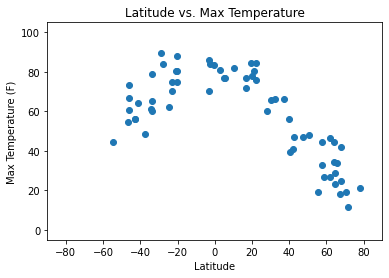

In [17]:
# Latitude vs. Temperature scatterplot
plt.scatter(latitude, max_temperature)
plt.title('Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlim(-90, 90)
plt.ylim(-5, 105)

# Code creates scatterplot that shows the maximum temperature for cities based on latitude. As one might expect, the closer that
# a city is to the equator (latitude 0), the higher the maximum temperature.

(-5.0, 105.0)

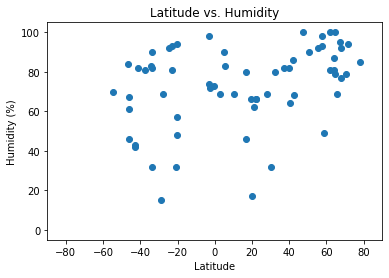

In [18]:
# Latitude vs. Humidity scatterplot
plt.scatter(latitude, humidity)
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim(-90, 90)
plt.ylim(-5, 105)

# Code creates scatterplot that shows the humidity for cities based on latitude.

(-5.0, 105.0)

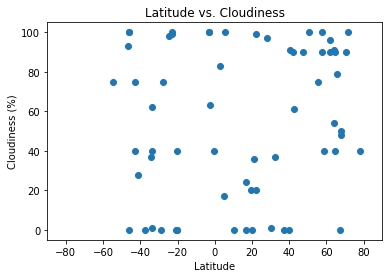

In [19]:

# Latitude vs. Cloudiness scatterplot
plt.scatter(latitude, cloudiness)
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim(-90, 90)
plt.ylim(-5, 105)

# Code creates scatterplot that shows the cloudiness for cities based on latitude.

(-5.0, 50.0)

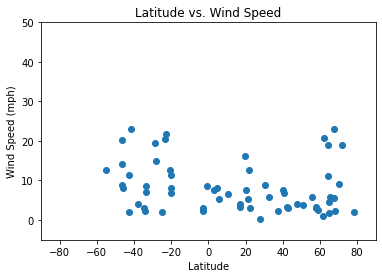

In [20]:
# Latitude vs. Wind Speed scatterplot
plt.scatter(latitude, wind_speed)
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim(-90, 90)
plt.ylim(-5, 50)

# Code creates scatterplot that shows the wind speed for cities based on latitude.

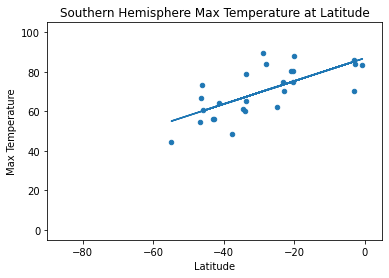

In [21]:
# Linear Regression for Southern Hemispheres (Max Temperature)
slope, intercept, r_value, p_value, std_err = st.linregress(SouthernHemiDF['Latitude'], SouthernHemiDF['Max Temperature'])

SouthernHemiDF.plot.scatter('Latitude', 'Max Temperature', title = 'Southern Hemisphere Max Temperature at Latitude')
plt.xlim(-90, 5)
plt.ylim(-5, 105)
plt.plot(SouthernHemiDF['Latitude'], intercept + slope * SouthernHemiDF['Latitude'])

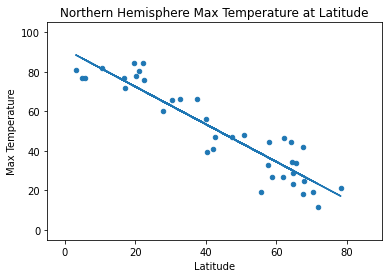

In [22]:
# Linear Regression for Northern Hemispheres (Max Temperature)
slope, intercept, r_value, p_value, std_err = st.linregress(NorthernHemiDF['Latitude'], NorthernHemiDF['Max Temperature'])

NorthernHemiDF.plot.scatter('Latitude', 'Max Temperature', title = 'Northern Hemisphere Max Temperature at Latitude')
plt.xlim(-5, 90)
plt.ylim(-5, 105)
plt.plot(NorthernHemiDF['Latitude'], intercept + slope * NorthernHemiDF['Latitude'])

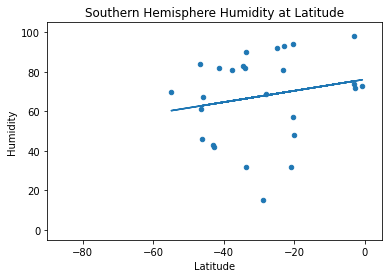

In [23]:
# Linear Regression for Southern Hemispheres (Humidity)
slope, intercept, r_value, p_value, std_err = st.linregress(SouthernHemiDF['Latitude'], SouthernHemiDF['Humidity'])

SouthernHemiDF.plot.scatter('Latitude', 'Humidity', title = 'Southern Hemisphere Humidity at Latitude')
plt.xlim(-90, 5)
plt.ylim(-5, 105)
plt.plot(SouthernHemiDF['Latitude'], intercept + slope * SouthernHemiDF['Latitude'])

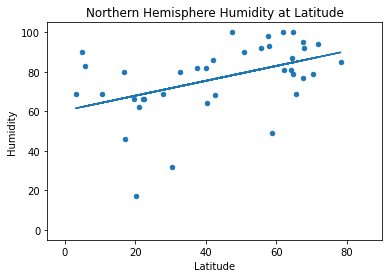

In [24]:
# Linear Regression for Northern Hemispheres (Humidity)
slope, intercept, r_value, p_value, std_err = st.linregress(NorthernHemiDF['Latitude'], NorthernHemiDF['Humidity'])

NorthernHemiDF.plot.scatter('Latitude', 'Humidity', title = 'Northern Hemisphere Humidity at Latitude')
plt.xlim(-5, 90)
plt.ylim(-5, 105)
plt.plot(NorthernHemiDF['Latitude'], intercept + slope * NorthernHemiDF['Latitude'])

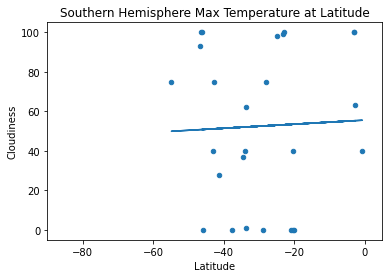

In [25]:
# Linear Regression for Southern Hemispheres (Cloudiness)
slope, intercept, r_value, p_value, std_err = st.linregress(SouthernHemiDF['Latitude'], SouthernHemiDF['Cloudiness'])

SouthernHemiDF.plot.scatter('Latitude', 'Cloudiness', title = 'Southern Hemisphere Max Temperature at Latitude')
plt.xlim(-90, 5)
plt.ylim(-5, 105)
plt.plot(SouthernHemiDF['Latitude'], intercept + slope * SouthernHemiDF['Latitude'])

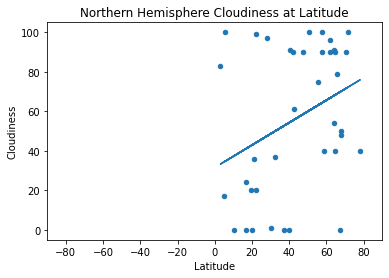

In [26]:
# Linear Regression for Northern Hemispheres (Cloudiness)
slope, intercept, r_value, p_value, std_err = st.linregress(NorthernHemiDF['Latitude'], NorthernHemiDF['Cloudiness'])

NorthernHemiDF.plot.scatter('Latitude', 'Cloudiness', title = 'Northern Hemisphere Cloudiness at Latitude')
plt.xlim(-90, 90)
plt.ylim(-5, 105)
plt.plot(NorthernHemiDF['Latitude'], intercept + slope * NorthernHemiDF['Latitude'])

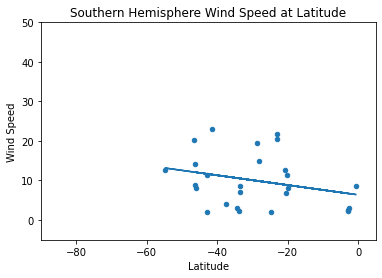

In [27]:
# Linear Regression for Southern Hemispheres (Wind Speed)
slope, intercept, r_value, p_value, std_err = st.linregress(SouthernHemiDF['Latitude'], SouthernHemiDF['Wind Speed'])

SouthernHemiDF.plot.scatter('Latitude', 'Wind Speed', title = 'Southern Hemisphere Wind Speed at Latitude')
plt.xlim(-90, 5)
plt.ylim(-5, 50)
plt.plot(SouthernHemiDF['Latitude'], intercept + slope * SouthernHemiDF['Latitude'])

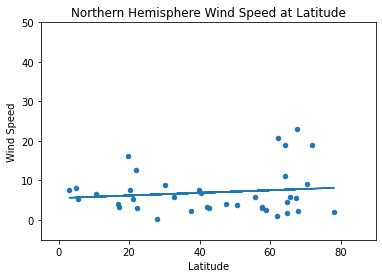

In [28]:
# Linear Regression for Northern Hemispheres (Wind Speed)
slope, intercept, r_value, p_value, std_err = st.linregress(NorthernHemiDF['Latitude'], NorthernHemiDF['Wind Speed'])

NorthernHemiDF.plot.scatter('Latitude', 'Wind Speed', title = 'Northern Hemisphere Wind Speed at Latitude')
plt.xlim(-5, 90)
plt.ylim(-5, 50)
plt.plot(NorthernHemiDF['Latitude'], intercept + slope * NorthernHemiDF['Latitude'])